#**Nitrogen Dioxide analysis at 0.25x0.25 degree for Indian cities**

In [30]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm

In [31]:
OMINO2_PATH="omino2/data/" #NO2 data path
COVID_PATH="covidoxford/data/" #covidoxford path
CITIES_PATH="cities/data/" #cities data path

In [32]:
cities_df=pd.read_csv(CITIES_PATH+"cities_0.25degx0.25deg.csv",error_bad_lines=False)

b'Skipping line 302: expected 5 fields, saw 6\n'


In [33]:
omino2_df=pd.read_csv(OMINO2_PATH+"indian_cities_0.25degx0.25deg_omino2.csv")

**unique parameters**

In [34]:
omino2_df["metric"].unique()

array(['ColumnAmountNO2', 'ColumnAmountNO2CloudScreened',
       'ColumnAmountNO2Trop', 'ColumnAmountNO2TropCloudScreened'],
      dtype=object)

**metric use**: ColumnAmountNO2<br>
mean value greater tha -9999 and nan removed

In [35]:
metric="ColumnAmountNO2"
metric_df=omino2_df[(omino2_df["metric"]==metric)&(omino2_df["mean"]>-9999)&(~omino2_df["mean"].isna())]

In [36]:
metric_df

,location,week,metric,mean
0,17.375#77.375,1.2019.week1,ColumnAmountNO2,2.207311e+15
1,17.375#77.875,1.2019.week1,ColumnAmountNO2,2.279101e+15
2,17.875#76.375,1.2019.week1,ColumnAmountNO2,2.333815e+15
3,17.875#76.625,1.2019.week1,ColumnAmountNO2,2.187244e+15
4,17.875#76.875,1.2019.week1,ColumnAmountNO2,2.288642e+15
...,...,...,...,...
1176194,19.625#78.625,9.2021.week4,ColumnAmountNO2,3.253517e+15
1176195,23.625#84.375,9.2021.week4,ColumnAmountNO2,3.137470e+15
1176196,24.375#81.875,9.2021.week4,ColumnAmountNO2,3.215519e+15
1176197,24.375#81.375,9.2021.week4,ColumnAmountNO2,3.325812e+15


# **Weekwise NO2 average of all cities of 2019 and 2020**
The data downloaded was on daily interval. While extracting data the data was also mapped to 4 weeks a month and each week consists of 8 days. So for all 12 months and 4 weeks data is taken making around 48 points for both years. 

In [37]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,5):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=100:
            x.append((month-1)*4+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",temp1[-1],"2020 =",temp2[-1])

 month = 1  week = 1 2019 = 2287539260282447.0 2020 = 2721262988890023.0
 month = 1  week = 2 2019 = 2213463951465260.8 2020 = 2726958387233373.0
 month = 1  week = 3 2019 = 2233759032007278.5 2020 = 2644070854139952.5
 month = 1  week = 4 2019 = 1772616562714720.8 2020 = 2665475817139103.0
 month = 2  week = 1 2019 = 2365654912919116.0 2020 = 2625638904436756.5
 month = 2  week = 2 2019 = 2264135342331924.0 2020 = 2660266059339206.5
 month = 2  week = 3 2019 = 2276537158953427.5 2020 = 2568638848451016.0
 month = 2  week = 4 2019 = 2683346273828060.0 2020 = 2238297112678459.2
 month = 3  week = 1 2019 = 2464461492994095.5 2020 = 2749922976231317.0
 month = 3  week = 2 2019 = 2444866696873712.5 2020 = 2795415389171671.5
 month = 3  week = 3 2019 = 1940009232066491.2 2020 = 1867946707588082.5
 month = 3  week = 4 2019 = 2842591445772346.0 2020 = 2686161088640491.5
 month = 4  week = 1 2019 = 2305967234397408.5 2020 = 2299949466455863.5
 month = 4  week = 2 2019 = 1842908845119640.8 2020

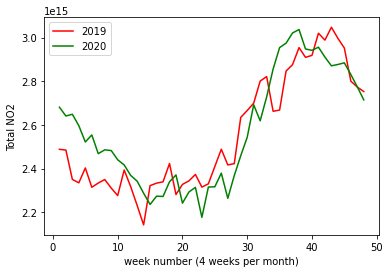

In [38]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Total NO2")
plt.show()

# **Pre and Post lockdown in 2020**<br>
Pre lockdown for 2020: march first week<br>
Post lockdown for 2020: april first week<br>
Difference of post and pre is taken

In [39]:
week1="3.2020.week1"
week2="4.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    2244.000000
mean       -5.022833
std         8.261542
min       -35.765178
25%       -10.752447
50%        -5.517916
75%         0.100299
max        31.053538
Name: diff, dtype: float64

mean of difference where population is atleast a million

In [40]:
week_df[week_df["population"]>=1000000]["diff"].describe()

count    43.000000
mean     -3.637403
std       6.516088
min     -16.483047
25%      -7.196102
50%      -2.943240
75%       0.163234
max      11.005797
Name: diff, dtype: float64

In [41]:
week_df[week_df["population"]>=2000000]

,location,week_pre,mean_pre,week_post,mean_post,city,population,elevation,diff
6,21.125#79.125,3.2020.week1,2.243551e+15,4.2020.week1,2.371004e+15,Nagpur,2317456,304,5.680866
333,17.375#78.375,3.2020.week1,2.258891e+15,4.2020.week1,2.235621e+15,Hyderabad,4117880,551,-1.030161
879,26.875#80.875,3.2020.week1,2.804243e+15,4.2020.week1,2.372520e+15,Lucknow,2490343,127,-15.395360
1014,13.125#80.375,3.2020.week1,2.086350e+15,4.2020.week1,2.017585e+15,Chennai,4663073,9,-3.295945
1025,26.375#80.375,3.2020.week1,2.701722e+15,4.2020.week1,2.481120e+15,Kanpur,2834007,134,-8.165236
1134,22.625#88.375,3.2020.week1,2.372811e+15,4.2020.week1,2.362462e+15,Kolkata,8539531,9,-0.436137
1232,22.875#88.375,3.2020.week1,2.431235e+15,4.2020.week1,2.365088e+15,Bhatpara,2641204,13,-2.720720
1552,28.625#77.125,3.2020.week1,2.571778e+15,4.2020.week1,2.644810e+15,Delhi,12927387,222,2.839751
1560,26.875#75.875,3.2020.week1,2.604393e+15,4.2020.week1,2.522211e+15,Jaipur,2711758,435,-3.155503
1627,18.625#73.875,3.2020.week1,2.263108e+15,4.2020.week1,2.299042e+15,Pune,5336520,571,1.587800


cities with atleast 15% dip and with atleast 1 lakh population<br>
cities with atleast 20% dip

In [42]:
print("--- cities with atleast 15% dip and with atleast 1 lakh population ---")
print(week_df[(week_df["diff"]<=-15)&(week_df["population"]>=100000)]["city"].tolist())
print("--- cities with atleast 20% dip ---")
print(week_df[(week_df["diff"]<=-20)]["city"].tolist())

--- cities with atleast 15% dip and with atleast 1 lakh population ---
['Purnia', 'Moradabad', 'Orai', 'Forbesganj', 'Rampur', 'Puruliya', 'Bhind', 'Robertsonpet', 'Nandyal', 'Bankura', 'Jharia', 'Asansol', 'Chas', 'Kashipur', 'Unnao', 'Teni', 'Tambaram', 'Hoshangabad', 'Murwara', 'Lucknow', 'Parli Vaijnath', 'Latur', 'Solapur', 'Fyzabad', 'Bahraigh', 'Raebareli', 'Sitapur', 'Deoria', 'Pathankot', 'Karimnagar', 'Amroha', 'Hanumangarh', 'Bengaluru', 'Yamunanagar', 'Gangoh', 'Kayankulam', 'Tiruvalla', 'Gangapur', 'Chandpur', 'Bijnor', 'Nagina', 'Moga', 'Dewas', 'Batala', 'Ahmadnagar', 'Abohar', 'Khanna']
--- cities with atleast 20% dip ---
['Mankapur', 'Mandvi', 'Churachandpur', 'Jammalamadugu', 'Moradabad', 'Usilampatti', 'Saiha', 'Araria', 'Forbesganj', 'Bahadurganj', 'Samthar', 'Puruliya', 'Lakhyabad', 'Chas', 'Bah', 'Kashipur', 'Pakala', 'Ahmadpur', 'Vattalkundu', 'Neelankarai', 'Tisaiyanvilai', 'Fyzabad', 'Talikota', 'Kati', 'Chandbali', 'Biswan', 'Raebareli', 'Bachhrawan', 'Utraula

**Takeaway**: Bangalore and Lucknow observed around 16% decrease in NO2 in second week of lockdown compared to first week of march. Cities with more than 1 million population observed around 3.5 decrease.


Pre lockdown for 2020: march first week<br>
Post lockdown for 2020: april second week<br>
Difference of post and pre is taken

In [43]:
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    2244.000000
mean       -8.102878
std         8.042025
min       -36.563538
25%       -13.401219
50%        -8.509844
75%        -3.523893
max        35.353886
Name: diff, dtype: float64

**Takeaway**: In fourth week of April, we see more than 8% dip in NO2 levels compared to first week of march. For populous also, the dip is around 9%.

In [44]:
week_df[week_df["population"]>=1000000]["diff"].describe()

count    43.000000
mean     -9.335782
std       7.583696
min     -28.619618
25%     -12.948560
50%      -9.329527
75%      -5.820225
max      15.889363
Name: diff, dtype: float64

In [45]:
week_df[week_df["population"]>=2000000]

,location,week_pre,mean_pre,week_post,mean_post,city,population,elevation,diff
6,21.125#79.125,3.2020.week1,2.243551e+15,4.2020.week4,1.995465e+15,Nagpur,2317456,304,-11.057735
333,17.375#78.375,3.2020.week1,2.258891e+15,4.2020.week4,1.934390e+15,Hyderabad,4117880,551,-14.365478
879,26.875#80.875,3.2020.week1,2.804243e+15,4.2020.week4,2.311837e+15,Lucknow,2490343,127,-17.559316
1014,13.125#80.375,3.2020.week1,2.086350e+15,4.2020.week4,1.863067e+15,Chennai,4663073,9,-10.702078
1025,26.375#80.375,3.2020.week1,2.701722e+15,4.2020.week4,2.319998e+15,Kanpur,2834007,134,-14.128933
1134,22.625#88.375,3.2020.week1,2.372811e+15,4.2020.week4,2.148988e+15,Kolkata,8539531,9,-9.432796
1232,22.875#88.375,3.2020.week1,2.431235e+15,4.2020.week4,2.232356e+15,Bhatpara,2641204,13,-8.180170
1552,28.625#77.125,3.2020.week1,2.571778e+15,4.2020.week4,2.589009e+15,Delhi,12927387,222,0.669974
1560,26.875#75.875,3.2020.week1,2.604393e+15,4.2020.week4,2.312064e+15,Jaipur,2711758,435,-11.224472
1627,18.625#73.875,3.2020.week1,2.263108e+15,4.2020.week4,2.075230e+15,Pune,5336520,571,-8.301784


# **Comparison of percentage change between pre and post lockdown dates of 2019 and 2020**
Difference of march 1st week in 2019 and march 4th week in 2019 is taken<br>
Difference of march 1st week in 2020 and march 4th week in 2020 is taken<br>

         diff_2019    diff_2020    population    elevation
count  2244.000000  2244.000000  2.244000e+03  2244.000000
mean      1.029678    -4.090275  1.304085e+05   322.541889
std      10.369425     8.823731  5.754583e+05   378.337938
min     -29.388298   -31.802118  0.000000e+00 -4990.000000
25%      -5.880157   -10.027731  1.905825e+04    91.000000
50%       0.243744    -4.676023  3.785200e+04   226.000000
75%       7.208050     1.200369  8.350550e+04   440.000000
max      51.981130    38.929617  1.468297e+07  3560.000000


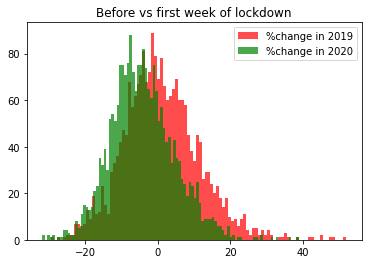

In [46]:
week1="3.2019.week1"
week2="3.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="3.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs first week of lockdown")
plt.show()

Difference of march 1st week in 2019 and april 4th week in 2019 is taken<br>
Difference of march 1st week in 2020 and april 4th week in 2020 is taken<br>

         diff_2019    diff_2020    population    elevation
count  2244.000000  2244.000000  2.244000e+03  2244.000000
mean      1.922678    -8.102878  1.304085e+05   322.541889
std      11.230830     8.042025  5.754583e+05   378.337938
min     -29.778396   -36.563538  0.000000e+00 -4990.000000
25%      -5.745101   -13.401219  1.905825e+04    91.000000
50%       2.241892    -8.509844  3.785200e+04   226.000000
75%       9.289722    -3.523893  8.350550e+04   440.000000
max      56.326067    35.353886  1.468297e+07  3560.000000


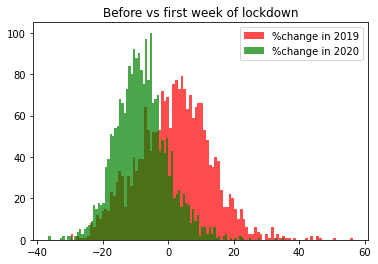

In [47]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs first week of lockdown")
plt.show()

Difference of march 1st week in 2019 and may 4th week in 2019 is taken<br>
Difference of march 1st week in 2020 and may 4th week in 2020 is taken<br>

         diff_2019    diff_2020    population    elevation
count  2244.000000  2244.000000  2.244000e+03  2244.000000
mean      1.566502    -9.148376  1.304085e+05   322.541889
std       9.843238     7.986534  5.754583e+05   378.337938
min     -30.375828   -31.286724  0.000000e+00 -4990.000000
25%      -5.059591   -14.520222  1.905825e+04    91.000000
50%       0.591578    -9.750754  3.785200e+04   226.000000
75%       7.244936    -4.141781  8.350550e+04   440.000000
max      59.531814    28.250550  1.468297e+07  3560.000000


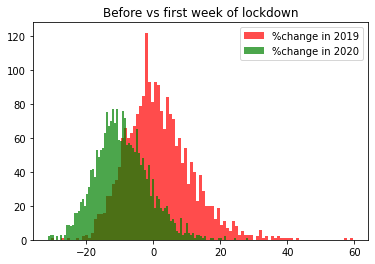

In [48]:
week1="3.2019.week1"
week2="5.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="5.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs first week of lockdown")
plt.show()

**Takeaway**: The changes in 2019 are positive (although average is 2% maximum). In 2020, the changes are negative, and the average percentage change is more negative when we are deep in the lockdown. It shows that in the lockdown period, in 2020 the NO2 levels decreased by 10% compared to pre-pandemic levels compared to 1-2% increase in 2019.

# **Impact of covid-19 on O3 compared to pre-lockdown dates' values** 

march 1st week in 2019 and march 4th week in 2019 are taken (non covid year)<br>
march 1st week in 2020 and march 4th week in 2020 are taken (covid year)<br>

The NO2 levels are scaled down by 1.0e+15

In [49]:
week1="3.2019.week1"
week2="3.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="3.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)
week_df["mean_pre"]=round(week_df["mean_pre"]/1.0e+15,2)
week_df["mean_post"]=round(week_df["mean_post"]/1.0e+15,2)
result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2219.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:50:35   Log-Likelihood:                 1055.4
No. Observations:                4490   AIC:                            -2105.
Df Residuals:                    4487   BIC:                            -2086.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8767      0.022     39.489      0.0

march 1st week in 2019 and april 4th week in 2019 are taken (non covid year)<br>
march 1st week in 2020 and april 4th week in 2020 are taken (covid year)<br>

In [50]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)
week_df["mean_pre"]=round(week_df["mean_pre"]/1.0e+15,2)
week_df["mean_post"]=round(week_df["mean_post"]/1.0e+15,2)
result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     1953.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:50:35   Log-Likelihood:                 972.51
No. Observations:                4490   AIC:                            -1939.
Df Residuals:                    4487   BIC:                            -1920.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9621      0.023     42.545      0.0

march 1st week in 2019 and may 4th week in 2019 are taken (non covid year)<br>
march 1st week in 2020 and may 4th week in 2020 are taken (covid year)<br>

In [51]:
week1="3.2019.week1"
week2="5.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="5.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)
week_df["mean_pre"]=round(week_df["mean_pre"]/1.0e+15,2)
week_df["mean_post"]=round(week_df["mean_post"]/1.0e+15,2)
result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2552.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:50:36   Log-Likelihood:                 1823.4
No. Observations:                4490   AIC:                            -3641.
Df Residuals:                    4487   BIC:                            -3622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0544      0.019     56.355      0.0

**Takeaway**: *The negative coefficient of covid indicator variable shows that in the covid-year the NO2 levels declined during lockdowns compared to pre-lockdown levels. As the lockdown progresses, the dip even got bigger and increased by 3-4 times. Clearly, covid-19 related lockdowns lead to reduction in NO2 levels.*